In [1]:
import os
import numpy as np

# If we have BasalGangliaData available, then lets use the newer data
if os.path.isdir("../../../../../BasalGangliaData/data/"):
    snudda_data = "../../../../../BasalGangliaData/data/"
    os.environ["SNUDDA_DATA"] = snudda_data
    print(f"Setting SNUDDA_DATA to {os.getenv('SNUDDA_DATA')}")
else:
    print("You need to compile NEURON mechanisms with the alternate path below.")
    
rc = None

Setting SNUDDA_DATA to ../../../../../BasalGangliaData/data/


In [2]:
import os
from snudda.simulate.network_pair_pulse_simulation import SnuddaNetworkPairPulseSimulation
n_dSPN = 5
n_iSPN = 5
n_FS = 2
n_LTS = 2
n_ChIN = 2

hold_v = -80e-3    # Holding voltage
max_dist = 100e-6  # Only look at pairs closer than this distance
GABA_rev = -60e-3  # GABA reversal potential

cur_inj = 10e-9

network_path = os.path.join("networks","pair_pulse_simulation")
volume_type="cube"
side_len = 200e-6

In [3]:
pps = SnuddaNetworkPairPulseSimulation(network_path=network_path,
                                       snudda_data=snudda_data,
                                       exp_type="Planert2010", 
                                       pre_type="FS",
                                       post_type="ALL",
                                       max_dist=max_dist,
                                       hold_voltage=hold_v,
                                       current_injection = cur_inj,
                                       random_seed=123)

Using log file networks/pair_pulse_simulation/log/pair-pulse.log
Checking depolarisation/hyperpolarisation of FS to ALL synapses


In [ ]:
pps.setup(n_dSPN=n_dSPN, n_iSPN=n_iSPN,
          n_FS=n_FS, n_LTS=n_LTS, n_ChIN=n_ChIN,
          volume_type=volume_type,
          side_len=side_len)

In [ ]:
from snudda.place import SnuddaPlace
sp = SnuddaPlace(network_path=network_path)
sp.place()

In [ ]:
from snudda.detect import SnuddaDetect
sd = SnuddaDetect(network_path=network_path)
sd.detect()

In [ ]:
from snudda.detect import SnuddaPrune
spr = SnuddaPrune(network_path=network_path)
spr.prune()
spr = None

Compile neuron modules. Here the BasalGangliaData is the default, if that is not available use:
```
nrnivmodl ../../../../snudda/data/neurons/mechanisms
```
It is recommended to use BasalGangliaData if available.

In [ ]:
!nrnivmodl ../../../../../BasalGangliaData/data/neurons/mechanisms

To run in parallel instead of the cell below, run this in the ```examples/notebooks/validation/synapses``` folder. 

*OBS* If you change the presynaptic neuron to another type, you need to change the ```--pre FS``` option.
```
mpiexec python3 ../../../../snudda/simulate/network_pair_pulse_simulation.py run Planert2010 networks/pair_pulse_simulation --pre FS
```

In [ ]:
pps.run_sim(gaba_rev=GABA_rev)

Plot results

Loading 16 neurons with 141 synapses and 0 gap junctions
Loading networks/pair_pulse_simulation/simulation/output.hdf5
Number of pairs excluded, distance > 100.0 mum : 0
Min amp: 0.000534124902853636
Max amp: 0.005156949399713326
Mean amp: 0.0026639450975665035 +/- 0.001604452029333743
Amps: [0.00053412 0.00316605 0.00225033 0.00252041 0.00066904 0.00515695
 0.00435072]


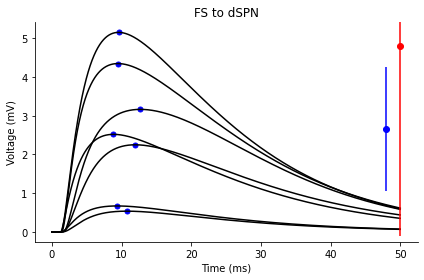

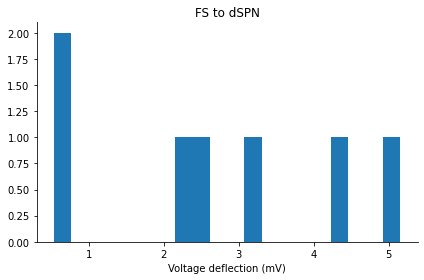

(2.6639450975665033,
 1.604452029333743,
 'networks/pair_pulse_simulation/figures/Planert2010-synapse-calibration-volt-traces-FS-dSPN.pdf',
 'networks/pair_pulse_simulation/figures/Planert2010-synapse-calibration-volt-histogram-FS-dSPN.pdf')

In [4]:
pps.analyse(post_type="dSPN")

Loading 16 neurons with 141 synapses and 0 gap junctions
Loading networks/pair_pulse_simulation/simulation/output.hdf5
Number of pairs excluded, distance > 100.0 mum : 0
Min amp: 0.001425181835974773
Max amp: 0.006117823277540679
Mean amp: 0.003751418331281076 +/- 0.001368467415508538
Amps: [0.00285292 0.00142518 0.00385834 0.00485026 0.00350311 0.0036523
 0.00611782]


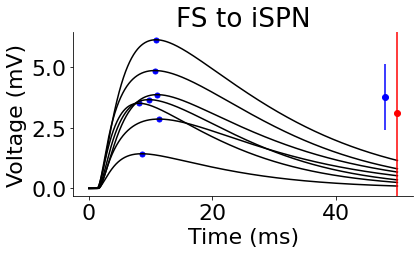

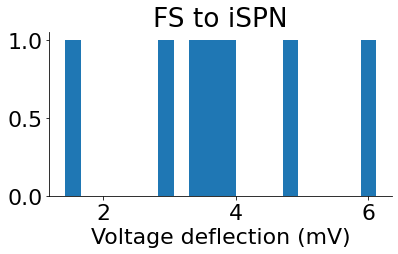

(3.751418331281076,
 1.368467415508538,
 'networks/pair_pulse_simulation/figures/Planert2010-synapse-calibration-volt-traces-FS-iSPN.pdf',
 'networks/pair_pulse_simulation/figures/Planert2010-synapse-calibration-volt-histogram-FS-iSPN.pdf')

In [5]:
pps.analyse(post_type="iSPN")